In [1]:
import requests
import json
from bs4 import BeautifulSoup as bs
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch, VerticalPitch

In [2]:
url_input = input('Enter URL match')
url_input

'https://www.fotmob.com/es/matches/girona-vs-athletic-club/24nz4z#4506840'

In [3]:
# check URL
url_input

'https://www.fotmob.com/es/matches/girona-vs-athletic-club/24nz4z#4506840'

In [4]:
# FotMob

url = url_input

r = requests.get(url)

soup = bs(r.content)

soup.find('script', attrs={'id': '__NEXT_DATA__'})

soup.find('script', attrs={'id': '__NEXT_DATA__'}).contents

soup.find('script', attrs={'id': '__NEXT_DATA__'}).contents[0]

json.loads(soup.find('script', attrs={'id': '__NEXT_DATA__'}).contents[0])

json_fotmob = json.loads(soup.find('script', attrs={'id': '__NEXT_DATA__'}).contents[0])

df_shots = pd.DataFrame(json_fotmob['props']['pageProps']['content']['shotmap']['shots'])
df_shots.head()

,id,eventType,teamId,playerId,playerName,x,y,min,minAdded,isBlocked,...,period,isOwnGoal,onGoalShot,isSavedOffLine,isFromInsideBox,firstName,lastName,fullName,teamColor,shortName
0,2731524051,Miss,8315,711231,Gorka Guruzeta,75.952913,40.553571,16,NaN,False,...,FirstHalf,False,"{'x': -2.220446049250313e-16, 'y': 0.010267450...",False,False,Gorka,Guruzeta,Gorka Guruzeta,#E2001A,NaN
1,2731527997,Miss,8315,574629,Alex Berenguer,91.700000,46.663185,19,NaN,False,...,FirstHalf,False,"{'x': 2, 'y': 0.09889169907362219, 'zoomRatio'...",False,True,Alex,Berenguer,Alex Berenguer,#E2001A,NaN
2,2731532323,AttemptSaved,7732,1277380,Yaser Asprilla,85.279412,34.838750,24,NaN,True,...,FirstHalf,False,"{'x': 0.8184523809523807, 'y': 0.3227513211640...",False,False,Yaser,Asprilla,Yaser Asprilla,#CF152D,NaN
3,2731535561,AttemptSaved,8315,574629,Alex Berenguer,94.000000,34.000000,28,NaN,False,...,FirstHalf,False,"{'x': 1.5849867724867723, 'y': 0.0101921469841...",False,True,Alex,Berenguer,Alex Berenguer,#E2001A,NaN
4,2731536625,AttemptSaved,7732,612836,Donny van de Beek,93.200000,40.973810,29,NaN,True,...,FirstHalf,False,"{'x': 0.7982804232804226, 'y': 0.3227513211640...",False,True,Donny van,de Beek,Donny van de Beek,#CF152D,Van de Beek


In [ ]:
# check if True in isOwnGoal
df_shots[['eventType', 'expectedGoals', 'situation', 'isOwnGoal']]

,eventType,expectedGoals,situation,isOwnGoal
0,Miss,0.016553,RegularPlay,False
1,Miss,0.028629,RegularPlay,False
2,AttemptSaved,0.031983,RegularPlay,False
3,AttemptSaved,0.788400,Penalty,False
4,AttemptSaved,0.098856,RegularPlay,False
5,AttemptSaved,0.020729,RegularPlay,False
6,Miss,0.225112,RegularPlay,False
7,AttemptSaved,0.172397,RegularPlay,False
8,Miss,0.063132,RegularPlay,False
9,Goal,0.013444,RegularPlay,False


In [6]:
# check if exists NaN in expectedGoals

has_nan = df_shots['expectedGoals'].isna().any()
print(has_nan)  # Returns True if there are NaN values, False otherwise

# nan_count = df_shots['expectedGoals'].isna().sum()
# print(nan_count)  # Returns the number of NaN values in the column

# no_nan = df_shots['expectedGoals'].notna().all()
# print(no_nan)  # Returns True if no NaN values are present

# df_shots.info()

False


In [22]:
df_shots[['eventType', 'expectedGoals', 'isOwnGoal']]

,eventType,expectedGoals,isOwnGoal
0,Miss,0.016553,False
1,Miss,0.028629,False
2,AttemptSaved,0.031983,False
3,AttemptSaved,0.788400,False
4,AttemptSaved,0.098856,False
5,AttemptSaved,0.020729,False
6,Miss,0.225112,False
7,AttemptSaved,0.172397,False
8,Miss,0.063132,False
9,Goal,0.013444,False


In [8]:
# If you want to convert it to a LIST add .tolist()

# xG = df_shots['expectedGoals']
# xG_list = xG.tolist()
# xG_list

# xG=df_shots.expectedGoals
# xG

# xG_loc = df_shots.loc[:, 'expectedGoals']
# xG_loc

xG_get = df_shots.get('expectedGoals')
xG_get

# Using .iloc[]: If you know the position of the name column (e.g., if it's the first column):
# column_position = df_shots.columns.get_loc('expectedGoals')

# column_position
# xG_iloc = df_shots.iloc[:, 15]
# xG_iloc

0     0.016553
1     0.028629
2     0.031983
3     0.788400
4     0.098856
5     0.020729
6     0.225112
7     0.172397
8     0.063132
9     0.013444
10    0.485233
11    0.142538
12    0.043443
13    0.145799
14    0.788400
15    0.022404
16    0.012013
17    0.065437
18    0.116886
19    0.022251
20    0.092551
21    0.243743
22    0.045142
23    0.060114
24    0.120605
25    0.788400
26    0.284881
Name: expectedGoals, dtype: float64

In [9]:
# Replace NaN with 0
# df_shots['expectedGoals'].fillna(0, inplace=True)

# Replace with the mean of the column:
# df_shots['expectedGoals'].fillna(df_shots['expectedGoals'].mean(), inplace=True)

# Replace with the median of the column:
df_shots['expectedGoals'].fillna(df_shots['expectedGoals'].median(), inplace=True)


In [10]:
# get local team id

local_team_id = json_fotmob['props']['pageProps']['general']['homeTeam']['id']
local_team_id

7732

In [11]:
# get general data

json_fotmob['props']['pageProps']['general']

{'matchId': '4506840',
 'matchName': 'Girona-vs-Athletic Club_Sun, Oct 6, 2024, 12:00 UTC',
 'matchRound': '9',
 'teamColors': {'darkMode': {'home': '#CF152D', 'away': '#FFFFFF'},
  'lightMode': {'home': '#CF152D', 'away': '#000000'},
  'fontDarkMode': {'home': 'rgba(255, 255, 255, 1.0)',
   'away': 'rgba(29, 29, 29, 1.0)'},
  'fontLightMode': {'home': 'rgba(255, 255, 255, 1.0)',
   'away': 'rgba(255, 255, 255, 1.0)'}},
 'leagueId': 87,
 'leagueName': 'LaLiga',
 'leagueRoundName': 'Round 9',
 'parentLeagueId': 87,
 'countryCode': 'ESP',
 'parentLeagueName': 'LaLiga',
 'parentLeagueSeason': '2024/2025',
 'parentLeagueTopScorerLink': 'https://data.fotmob.com/stats/87/season/23686/goals.json',
 'homeTeam': {'name': 'Girona', 'id': 7732},
 'awayTeam': {'name': 'Athletic Club', 'id': 8315},
 'coverageLevel': 'xG',
 'matchTimeUTC': 'Sun, Oct 6, 2024, 12:00 UTC',
 'matchTimeUTCDate': '2024-10-06T12:00:00.000Z',
 'started': True,
 'finished': True}

In [12]:
# get league name and league round for the viz

leagueName = json_fotmob['props']['pageProps']['general']['leagueName']
print(leagueName)
leagueRound = json_fotmob['props']['pageProps']['general']['leagueRoundName']
print(leagueRound)

LaLiga
Round 9


In [13]:
league_title = leagueName + ' | ' + leagueRound
league_title

'LaLiga | Round 9'

In [14]:
# local team info and away team info

json_fotmob['props']['pageProps']['header']['teams']

[{'name': 'Girona',
  'id': 7732,
  'score': 2,
  'imageUrl': 'https://images.fotmob.com/image_resources/logo/teamlogo/7732_small.png',
  'pageUrl': '/teams/7732/overview/girona',
  'fifaRank': None},
 {'name': 'Athletic Club',
  'id': 8315,
  'score': 1,
  'imageUrl': 'https://images.fotmob.com/image_resources/logo/teamlogo/8315_small.png',
  'pageUrl': '/teams/8315/overview/athletic-club',
  'fifaRank': None}]

In [15]:
# Get ID and team names

local_team_name = json_fotmob['props']['pageProps']['header']['teams'][0]['name']
print(local_team_name)
away_team_name = json_fotmob['props']['pageProps']['header']['teams'][1]['name']
print(away_team_name)

Girona
Athletic Club


In [16]:
# score

local_team_score = json_fotmob['props']['pageProps']['header']['teams'][0]['score']
print(local_team_score)
away_team_score = json_fotmob['props']['pageProps']['header']['teams'][1]['score']
print(away_team_score)

2
1


In [17]:
# title for the viz

plot_title = local_team_name + ' ' + str(local_team_score) + '-' + str(away_team_score) + ' ' + away_team_name
plot_title

'Girona 2-1 Athletic Club'

In [18]:
# Get color teams

json_fotmob['props']['pageProps']['general']['teamColors']

{'darkMode': {'home': '#CF152D', 'away': '#FFFFFF'},
 'lightMode': {'home': '#CF152D', 'away': '#000000'},
 'fontDarkMode': {'home': 'rgba(255, 255, 255, 1.0)',
  'away': 'rgba(29, 29, 29, 1.0)'},
 'fontLightMode': {'home': 'rgba(255, 255, 255, 1.0)',
  'away': 'rgba(255, 255, 255, 1.0)'}}

In [19]:
# local and away team names for the viz

shots_local_name = local_team_name + ' ' + 'shots'
shots_local_name = shots_local_name.upper()
print(shots_local_name)

shots_away_name = away_team_name + ' ' + 'shots'
shots_away_name = shots_away_name.upper()
print(shots_away_name)

GIRONA SHOTS
ATHLETIC CLUB SHOTS


In [20]:
# check type isOwnGoal | looks like a boolean

type('isOwnGoal')

str

In [86]:
df_shots.columns

Index(['id', 'eventType', 'teamId', 'playerId', 'playerName', 'x', 'y', 'min',
       'minAdded', 'isBlocked', 'isOnTarget', 'blockedX', 'blockedY',
       'goalCrossedY', 'goalCrossedZ', 'expectedGoals',
       'expectedGoalsOnTarget', 'shotType', 'situation', 'period', 'isOwnGoal',
       'onGoalShot', 'isSavedOffLine', 'isFromInsideBox', 'firstName',
       'lastName', 'fullName', 'teamColor'],
      dtype='object')

In [29]:
type('isOwnGoal')

str

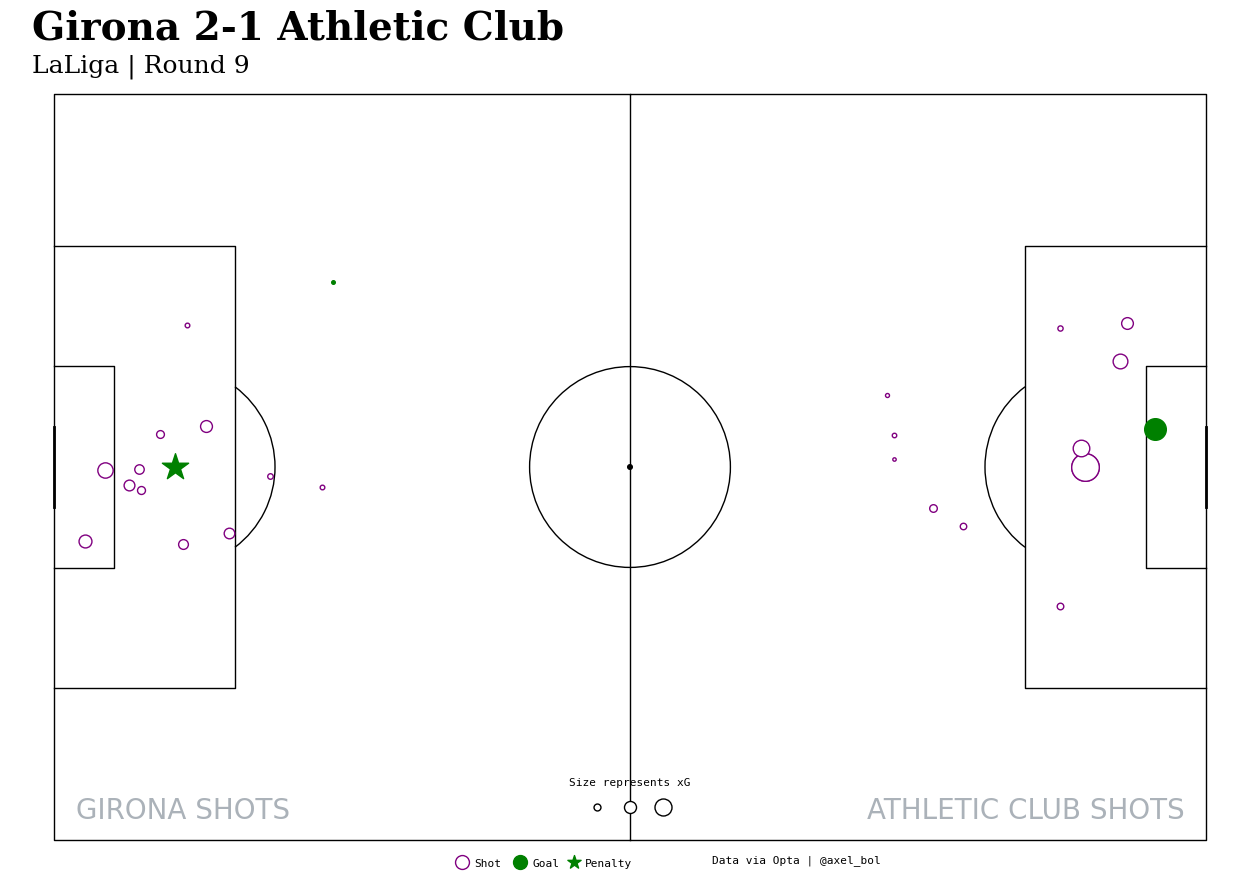

In [21]:
# add facecolor='red' if you want the color red around the pitch
fig, ax = plt.subplots(figsize=(16, 12))
pitch = Pitch(pitch_type='custom', pitch_length=105, pitch_width=68, line_color='black', linewidth=1, pitch_color='white', label=False)
pitch.draw(ax=ax)

# plot the shots
# We want the size of the shot to be 500 * the expected goals value
# We also want to leave the marker empty if the shot was missed and fill it if it was a goal
for x in df_shots.to_dict(orient='records'):
    if x['teamId'] == local_team_id:
        # We want to plot the local team on left side of the pitch
        # So we need to mirror both the x and y coordinates
        c_color = (
            'green' if x['eventType'] == 'Goal' and str(x['isOwnGoal']) == 'False'
            else 'red' if x['eventType'] == 'Goal' and str(x['isOwnGoal']) == 'True'
            else 'white'
        ),
        ec_edge_colors = (
            'green' if x['eventType'] == 'Goal' and str(x['isOwnGoal']) == 'False'
            else 'red' if x['eventType'] == 'Goal' and str(x['isOwnGoal']) == 'True'
            else 'purple'
        ),
        m_marker = (
            '*' if x['situation'] == 'Penalty' and x['eventType'] == 'Goal'
            else 'o'
        )
        pitch.scatter(
            x=105-x['x'],
            y=68-x['y'],
            ax=ax,
            s=500*x['expectedGoals'],
            ec=ec_edge_colors,
            c=c_color,
            marker=m_marker,
            # alpha=1 if x['eventType'] == 'Goal' else 0.5,
            zorder=2 if x['eventType'] == 'Goal' else 1
        )
    # right side
    else:
        c_color = (
            'green' if x['eventType'] == 'Goal' and str(x['isOwnGoal']) == 'False'
            else 'red' if x['eventType'] == 'Goal' and str(x['isOwnGoal']) == 'True'
            else 'white'
        ),
        ec_edge_colors = (
            'green' if x['eventType'] == 'Goal' and str(x['isOwnGoal']) == 'False'
            else 'red' if x['eventType'] == 'Goal' and str(x['isOwnGoal']) == 'True'
            else 'purple'
        ),
        m_marker = (
            '*' if x['situation'] == 'Penalty' and x['eventType'] == 'Goal'
            else 'o'
        )
        pitch.scatter(
            x=x['x'],
            y=x['y'],
            ax=ax,
            s=500*x['expectedGoals'],
            ec=ec_edge_colors,
            c=c_color,
            marker=m_marker,
            # alpha=1 if x['eventType'] == 'Goal' else .5,
            zorder=2 if x['eventType'] == 'Goal' else 1
        )

# fig.suptitle('The Strongest - Bolivar',  fontsize=15, fontweight=600)
# plt.title('Title', x=0.1, y=1)
# ax.set_title('División Profesional', x=0.1, y=0.95, fontsize=10, fontweight=600, color='black', loc='left')

# We can also add a title directly above the text we added
ax.text(-2, 73, plot_title, ha='left', fontsize=28, fontfamily='serif', fontweight=600, color='black')
ax.text(-2, 70, league_title, ha='left', fontsize=18, fontfamily='serif', fontweight=100)

# We can add a title above the different halves of the pitch
ax.text(2, 2, shots_local_name, ha='left', fontsize=20, fontweight=500, color='#abb2b9')
ax.text(103, 2, shots_away_name, ha='right', fontsize=20, fontweight=500, color='#abb2b9')

# Lets also add a legend for the size of the shots in the bottom middle of the pitch
pitch.scatter(49.5, 3, s=500*.05, ec='black', c='white', ax=ax)
pitch.scatter(52.5, 3, s=500*.15, ec='black', c='white', ax=ax)
pitch.scatter(55.5, 3, s=500*.3, ec='black', c='white', ax=ax)

# We can add a label for the legend
ax.text(52.5, 5, 'Size represents xG', ha='center', fontsize=8, fontfamily='monospace')

# Legend
if 'True' in str(df_shots['isOwnGoal'].values):
    pitch.scatter(29.3, -2, s=500*.2, ec='red', c='red', ax=ax)
    ax.text(33, -2.4, 'Own Goal', ha='center', fontsize=8, fontfamily='monospace')

pitch.scatter(37.2, -2, s=500*.2, ec='purple', c='white', ax=ax)
ax.text(39.5, -2.4, 'Shot', ha='center', fontsize=8, fontfamily='monospace')

pitch.scatter(42.5, -2, s=500*.2, ec='green', c='green', ax=ax)
ax.text(44.8, -2.4, 'Goal', ha='center', fontsize=8, fontfamily='monospace')

if 'Penalty' in df_shots['situation'].values and 'Goal' in df_shots['eventType'].values:
    pitch.scatter(47.4, -2, s=500*.2, ec='green', c='green', marker='*', ax=ax)
    ax.text(50.5, -2.4, 'Penalty', ha='center', fontsize=8, fontfamily='monospace')
# info
ax.text(60, -2, 'Data via Opta | @axel_bol', ha='left', fontsize=8, fontfamily='monospace')
# CHANGE THIS TO YOUR PATH
# plt.savefig('/home/axel/Code/images/image.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.35)
plt.show()